In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter

In [2]:
df_clusters = pd.read_csv("/work/Output Data/CloudResearch-1_24.08.12_clustered.csv")
df_clusters

,Unnamed:_0,index,StartDate,EndDate,Status_x,Progress,Duration_(in_seconds),Finished,RecordedDate,ResponseId,...,HHI_CommIntent___Familiar_centered,H_State_Empathy_centered,H_SEmp_Affective_centered,H_SEmp_Cognitive_centered,H_SEmp_Associative_centered,H_Social_Attract_centered,H_Task_Attract_centered,H_Homophily_centered,Age_centered,Cluster
0,0,2,2024-06-10 16:25:22,2024-06-10 16:36:39,IP Address,100,677,True,2024-06-10 16:36:40,R_3Tq3KIlfVrBymDk,...,1.090324,0.444724,-0.387472,0.575424,1.021357,0.713421,1.054605,-1.228242,-0.256860,5
1,1,3,2024-06-10 16:22:15,2024-06-10 16:37:20,IP Address,100,905,True,2024-06-10 16:37:21,R_77JLXrlZNFvFjZA,...,-1.232124,-3.172764,-3.002680,-2.625557,-3.178423,-0.627147,-1.609661,-0.545932,0.144966,0
2,2,4,2024-06-10 16:26:47,2024-06-10 16:39:38,IP Address,100,770,True,2024-06-10 16:39:38,R_1xOvnrl7kD6ysKd,...,1.090324,0.712686,0.733331,0.575424,0.671376,-1.520859,-1.609661,1.330419,-0.457773,5
3,3,5,2024-06-10 16:22:16,2024-06-10 16:39:57,IP Address,100,1060,True,2024-06-10 16:39:57,R_6i2xfeJezDf9zMB,...,-2.393348,-1.163048,-1.508276,-1.025067,-0.728551,-1.744287,-1.387639,-0.545932,-0.357317,1
4,4,6,2024-06-10 16:25:01,2024-06-10 16:40:11,IP Address,100,909,True,2024-06-10 16:40:11,R_2oYYZFDVjHmNVrC,...,-0.070900,0.310743,-0.013871,0.575424,0.321394,-0.403719,-0.277528,-0.034200,-0.256860,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,399,671,2024-08-05 17:07:39,2024-08-05 17:39:17,IP Address,100,1898,True,2024-08-05 17:39:18,R_5EA6LxEv0KYmvLe,...,0.703250,0.578705,0.359730,0.575424,0.671376,0.936849,0.610561,0.989264,-0.859599,1
400,400,673,2024-08-06 08:47:03,2024-08-06 08:55:45,IP Address,100,521,True,2024-08-06 08:55:46,R_1Dp5aKQHCAxZrmG,...,0.703250,0.846667,0.359730,0.975546,1.021357,0.936849,0.832583,1.500997,0.747704,3
401,401,676,2024-08-06 21:41:46,2024-08-06 21:55:01,IP Address,100,794,True,2024-08-06 21:55:02,R_6IFqIBMPCNE0ZtT,...,-2.006274,-1.564991,-1.881877,-1.025067,-1.428514,-0.627147,-1.609661,-0.375355,-0.658686,0
402,402,693,2024-08-08 17:30:42,2024-08-08 17:46:22,IP Address,100,939,True,2024-08-08 17:46:23,R_40JjHfQYavKjN2N,...,1.090324,1.114629,1.106932,0.975546,1.021357,0.936849,1.054605,1.330419,-0.960055,3


In [3]:
df = df_clusters.copy()

df['Use_Interest'] = df['Use_Interest'].str.replace('To use it for a creative purpose (creative writing, character development, etc.)', 'Creative Purpose', regex=False)
df['Use_Interest'] = df['Use_Interest'].str.split(',')

df['Continued_Use'] = df['Continued_Use'].str.replace('To bolster self-confidence, self-esteem, etc.', 'To bolster self-confidence/self-esteem/etc.', regex=False)
df['Continued_Use'] = df['Continued_Use'].str.split(',')

df['Chatbot_Topics'] = df['Chatbot_Topics'].str.replace('Venting/talking about personal issues regarding yourself (mental health, problems you are facing)', 'Venting - personal issues', regex=False)
df['Chatbot_Topics'] = df['Chatbot_Topics'].str.replace('Venting/talking about personal issues regarding others (interpersonal drama, negative feelings towards others, etc.)', 'Venting - issues with others', regex=False)
df['Chatbot_Topics'] = df['Chatbot_Topics'].str.split(',')

df['Pref_Reason___Bot'] = df['Pref_Reason___Bot'].str.split(',')
df['Pref_Reason___Person'] = df['Pref_Reason___Person'].str.split(',')
df['Living_With'] = df['Living_With'].str.split(',')
df['Which_Chatbots'] = df['Which_Chatbots'].str.split(',')
df['Usage_Timeframe'] = df['Usage_Timeframe'].str.split(',')
df['Chatbot_Device'] = df['Chatbot_Device'].str.split(',')

for name in ['Agent_Pref_1', 'Agent_Pref_2', 'Agent_Pref_3', 'Agent_Pref_4', 'Agent_Pref_5', 'Agent_Pref_6']:
    df[name] = df[name].str.split(',')

df

,Unnamed:_0,index,StartDate,EndDate,Status_x,Progress,Duration_(in_seconds),Finished,RecordedDate,ResponseId,...,HHI_CommIntent___Familiar_centered,H_State_Empathy_centered,H_SEmp_Affective_centered,H_SEmp_Cognitive_centered,H_SEmp_Associative_centered,H_Social_Attract_centered,H_Task_Attract_centered,H_Homophily_centered,Age_centered,Cluster
0,0,2,2024-06-10 16:25:22,2024-06-10 16:36:39,IP Address,100,677,True,2024-06-10 16:36:40,R_3Tq3KIlfVrBymDk,...,1.090324,0.444724,-0.387472,0.575424,1.021357,0.713421,1.054605,-1.228242,-0.256860,5
1,1,3,2024-06-10 16:22:15,2024-06-10 16:37:20,IP Address,100,905,True,2024-06-10 16:37:21,R_77JLXrlZNFvFjZA,...,-1.232124,-3.172764,-3.002680,-2.625557,-3.178423,-0.627147,-1.609661,-0.545932,0.144966,0
2,2,4,2024-06-10 16:26:47,2024-06-10 16:39:38,IP Address,100,770,True,2024-06-10 16:39:38,R_1xOvnrl7kD6ysKd,...,1.090324,0.712686,0.733331,0.575424,0.671376,-1.520859,-1.609661,1.330419,-0.457773,5
3,3,5,2024-06-10 16:22:16,2024-06-10 16:39:57,IP Address,100,1060,True,2024-06-10 16:39:57,R_6i2xfeJezDf9zMB,...,-2.393348,-1.163048,-1.508276,-1.025067,-0.728551,-1.744287,-1.387639,-0.545932,-0.357317,1
4,4,6,2024-06-10 16:25:01,2024-06-10 16:40:11,IP Address,100,909,True,2024-06-10 16:40:11,R_2oYYZFDVjHmNVrC,...,-0.070900,0.310743,-0.013871,0.575424,0.321394,-0.403719,-0.277528,-0.034200,-0.256860,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,399,671,2024-08-05 17:07:39,2024-08-05 17:39:17,IP Address,100,1898,True,2024-08-05 17:39:18,R_5EA6LxEv0KYmvLe,...,0.703250,0.578705,0.359730,0.575424,0.671376,0.936849,0.610561,0.989264,-0.859599,1
400,400,673,2024-08-06 08:47:03,2024-08-06 08:55:45,IP Address,100,521,True,2024-08-06 08:55:46,R_1Dp5aKQHCAxZrmG,...,0.703250,0.846667,0.359730,0.975546,1.021357,0.936849,0.832583,1.500997,0.747704,3
401,401,676,2024-08-06 21:41:46,2024-08-06 21:55:01,IP Address,100,794,True,2024-08-06 21:55:02,R_6IFqIBMPCNE0ZtT,...,-2.006274,-1.564991,-1.881877,-1.025067,-1.428514,-0.627147,-1.609661,-0.375355,-0.658686,0
402,402,693,2024-08-08 17:30:42,2024-08-08 17:46:22,IP Address,100,939,True,2024-08-08 17:46:23,R_40JjHfQYavKjN2N,...,1.090324,1.114629,1.106932,0.975546,1.021357,0.936849,1.054605,1.330419,-0.960055,3


In [4]:
def plot_multiple_choice_responses(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column, hue='Cluster', palette='deep')
    plt.title(f'{title} by Cluster')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_multiselect_responses(df, column, title):
    # Flatten the list of responses
    all_responses = [item for sublist in df[column].dropna() for item in sublist]
    
    # Count the occurrences of each response
    response_counts = Counter(all_responses)
    
    # Create a DataFrame with the counts for each cluster
    cluster_counts = df.groupby('Cluster')[column].apply(
        lambda x: pd.Series({k: sum(k in sublist for sublist in x if isinstance(sublist, list)) 
                             for k in response_counts.keys()})
    ).fillna(0)
    
    # Melt the DataFrame for plotting
    melted_df = cluster_counts.reset_index().melt(id_vars=['Cluster'], var_name='Option', value_name='Count')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=melted_df, x='Option', y='Count', hue='Cluster', palette='deep')
    plt.title(f'{title} by Cluster')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def chi_square_test(df, column):
    contingency_table = pd.crosstab(df['Cluster'], df[column])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test results for {column}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p_value}")
    print(f"Degrees of freedom: {dof}")
    print("---")

In [13]:
def cluster_countplot_percentage(df, colname, custom_order=None, ylim=100):
    # Define cluster order and color palette
    cluster_order = sorted(df['Cluster'].unique())
    cluster_pal = sns.color_palette("husl", n_colors=len(cluster_order))

    x, y = colname, 'Cluster'
    
    counts = df[y].value_counts()

    df_exploded = df.explode(colname)
    df_exploded.reset_index(drop=True, inplace=True)

    df1 = df_exploded.groupby(y)[x].value_counts()
    multiplier_mapping = {cluster: counts[cluster] for cluster in cluster_order}
    df1 = df1.rename('Percent by Cluster').reset_index()
    df1['Percent by Cluster'] = df1['Percent by Cluster'] / df1['Cluster'].map(multiplier_mapping)
    df1['Percent by Cluster'] = df1['Percent by Cluster'].astype(float).mul(100)

    plt.figure(figsize=(12, 6))
    g = sns.barplot(x=x, y='Percent by Cluster', hue=y,
                    data=df1, hue_order=cluster_order, palette=cluster_pal)
    g.set_ylim(0, ylim)
    if custom_order is not None:
        g.set_xticklabels(labels=custom_order, rotation=30, ha='right')
    else:
        g.set_xticklabels(labels=g.get_xticklabels(), rotation=30, ha='right')
    g.set(title=colname)
    sns.move_legend(g, loc='upper right', bbox_to_anchor=(0.95, 0.95))
    plt.tight_layout()
    plt.show()

    #for p in g.ax.patches:
    #    txt = str(p.get_height().round(2)) + '%'
    #    txt_x = p.get_x() 
    #    txt_y = p.get_height()
    #    g.ax.text(txt_x,txt_y,txt, fontsize=6)

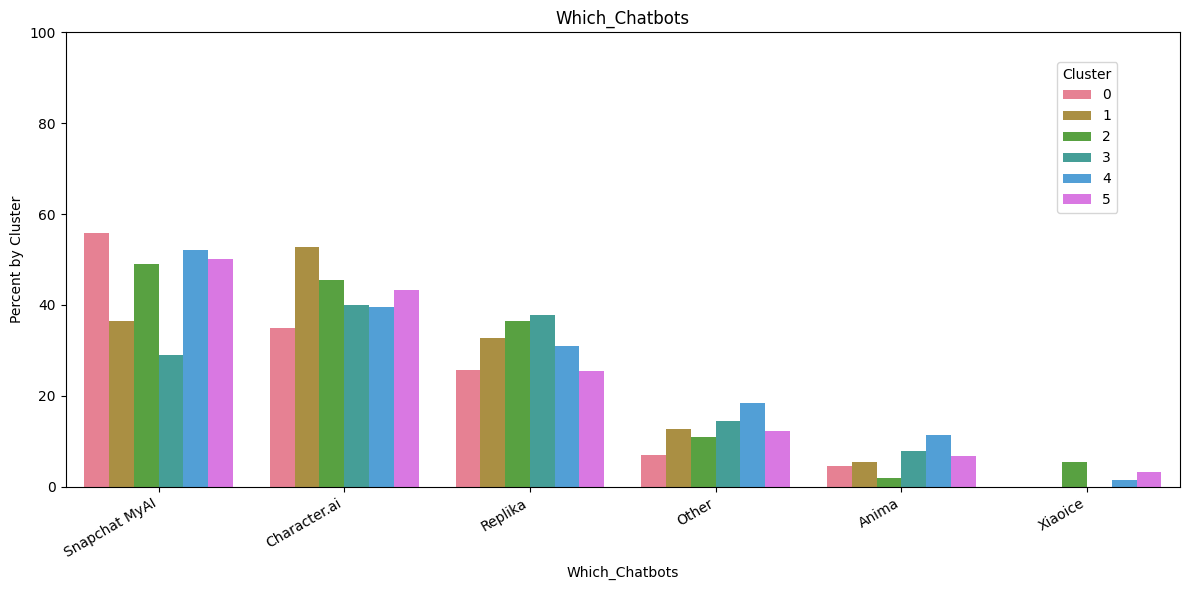

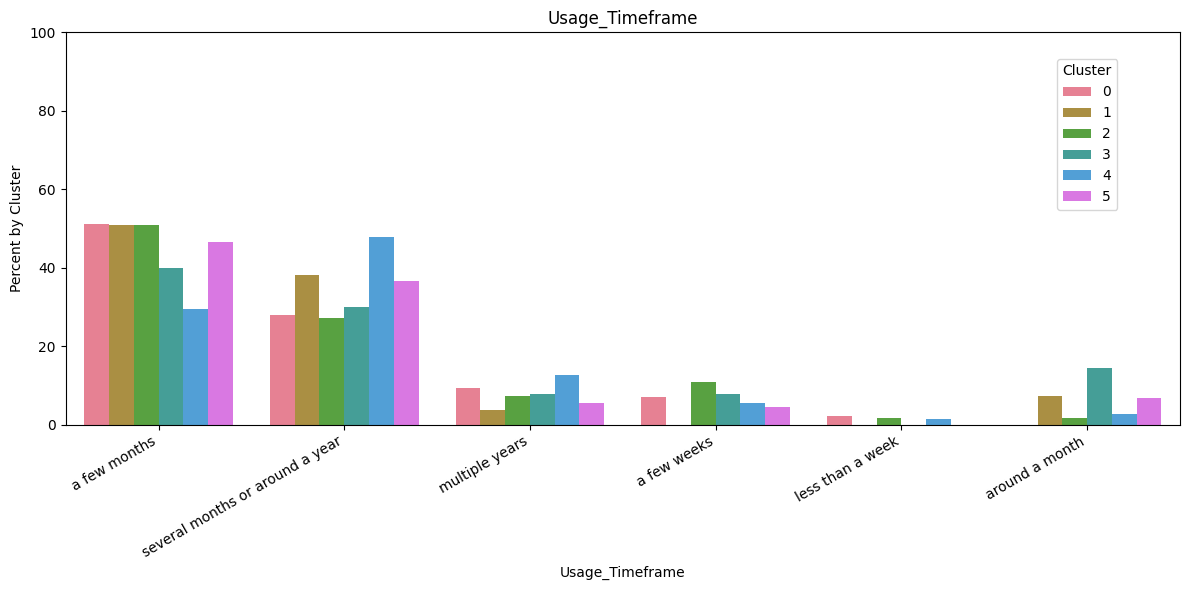

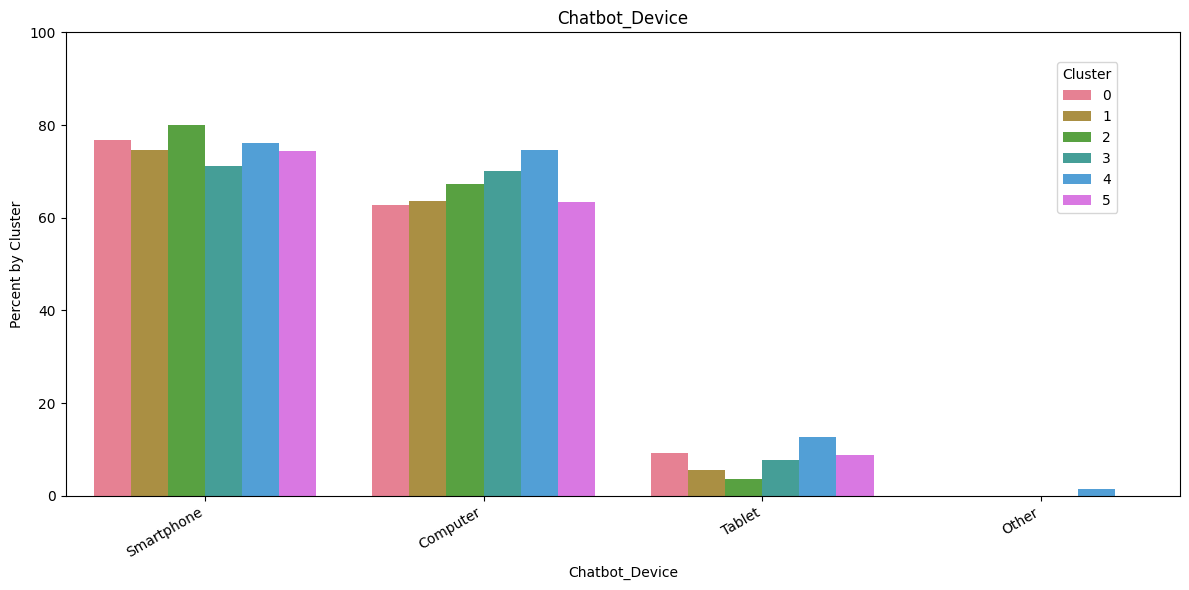

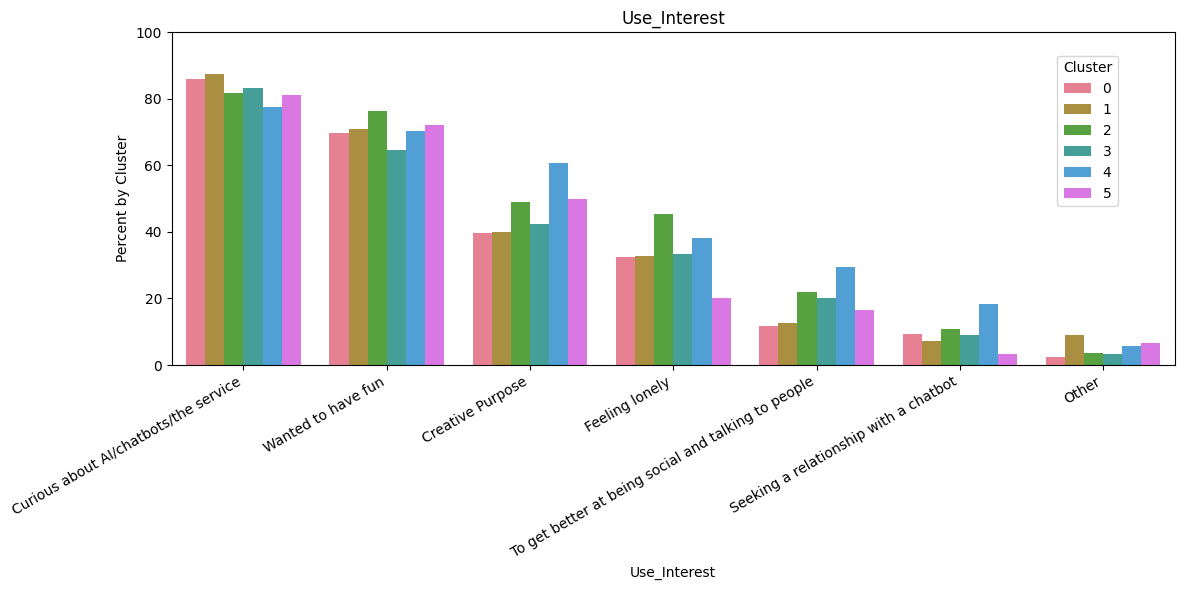

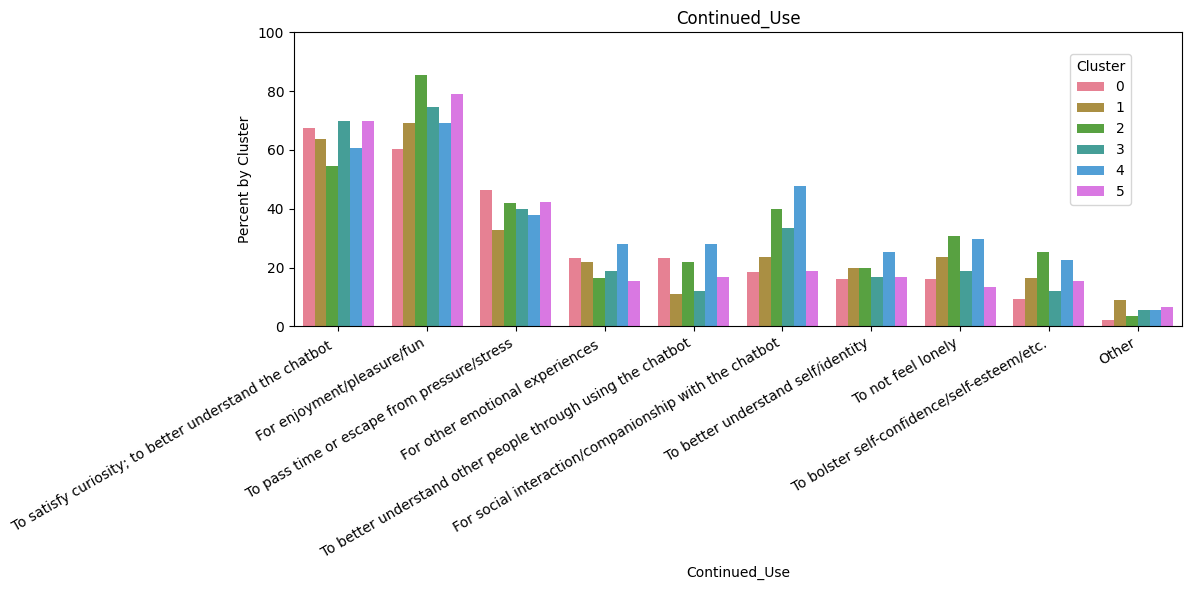

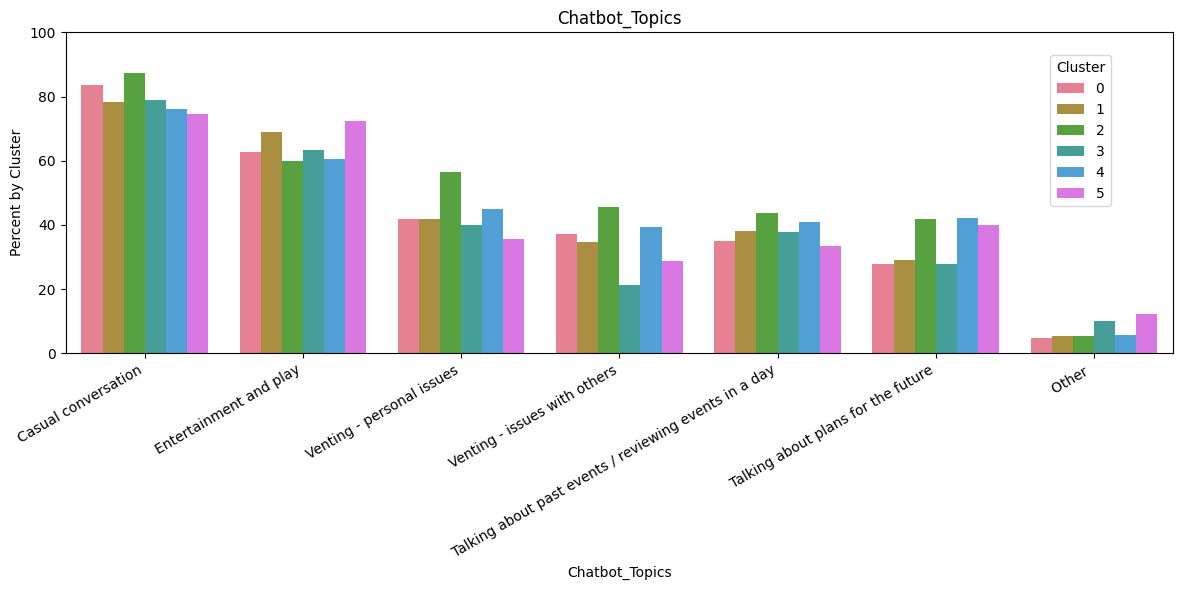

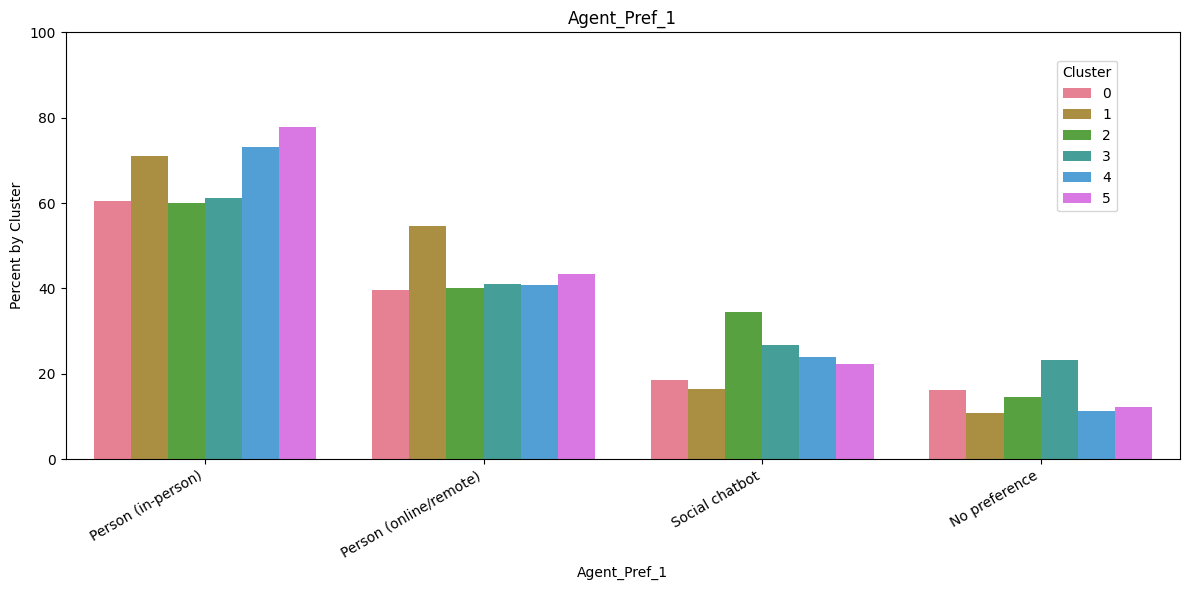

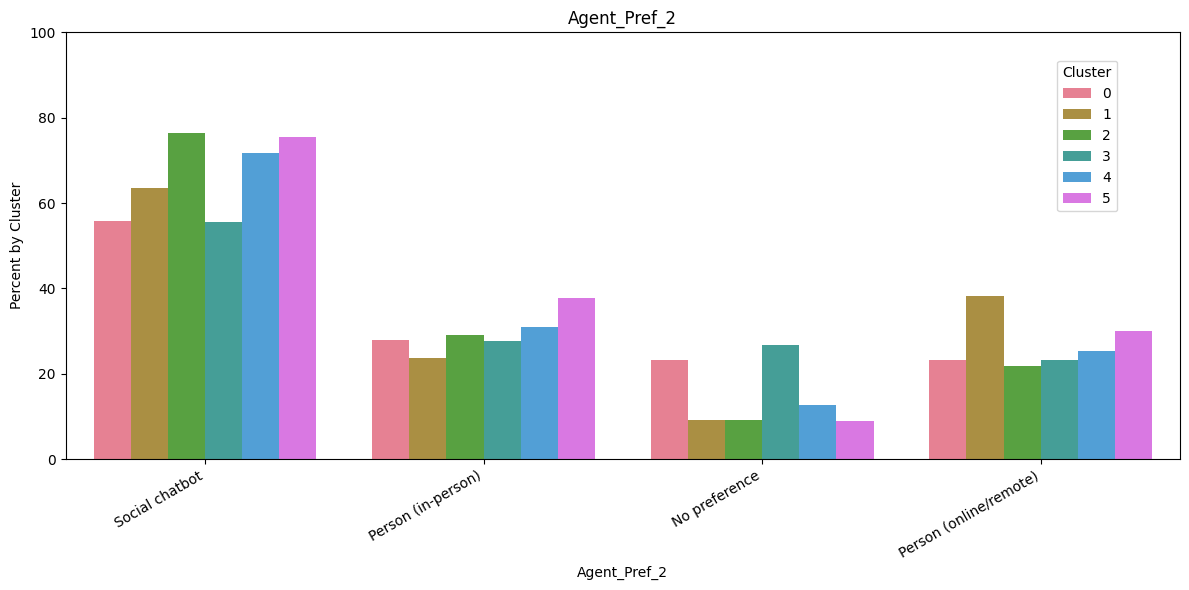

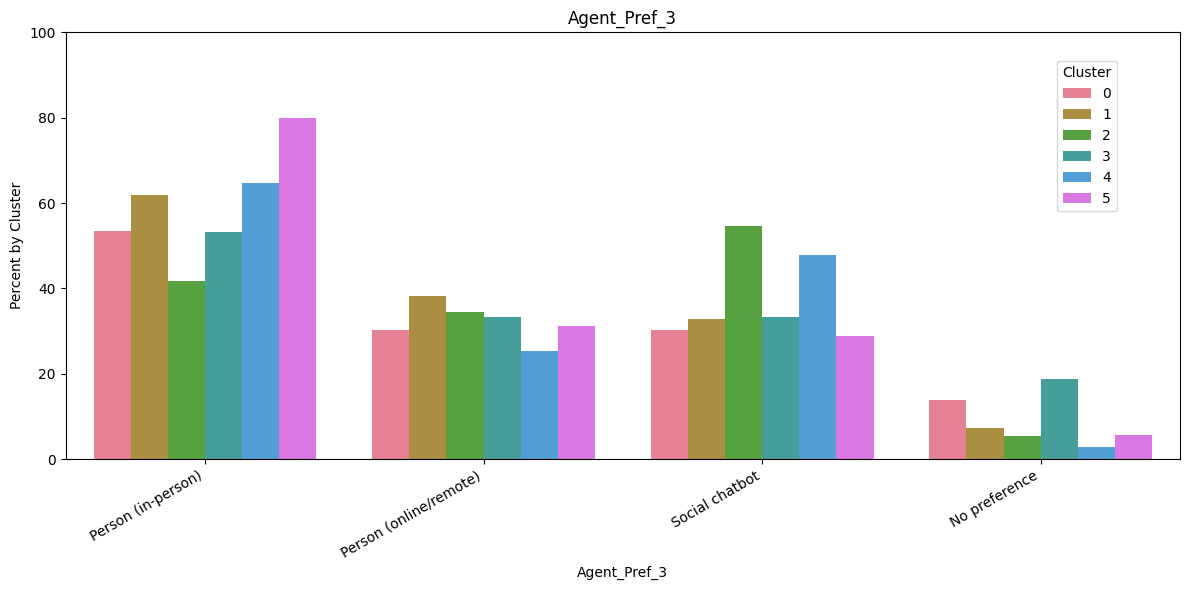

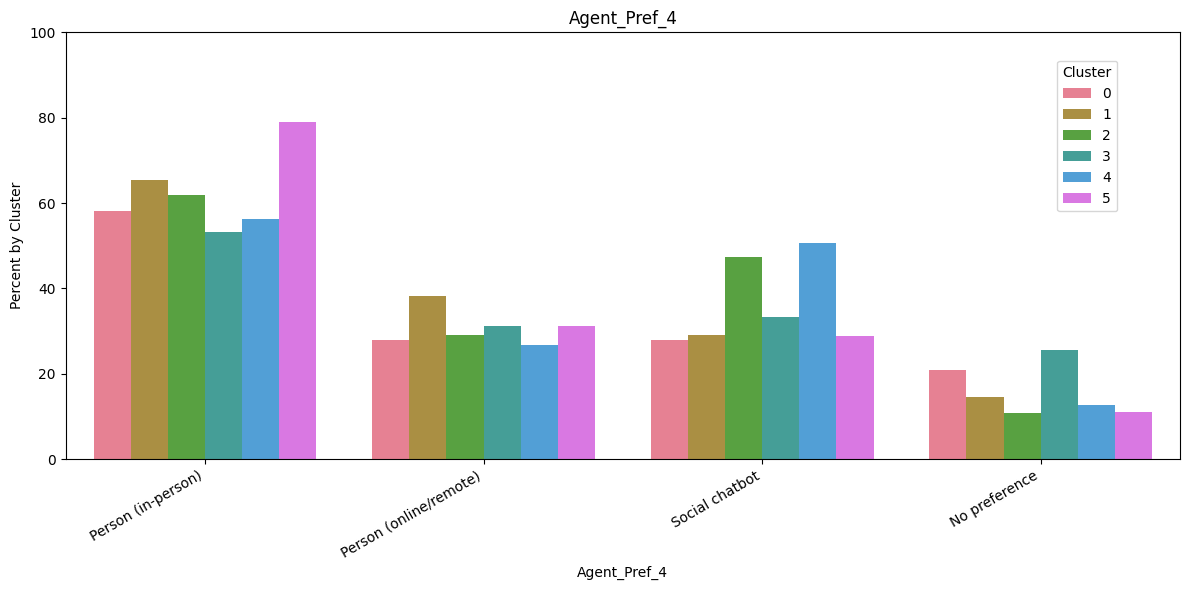

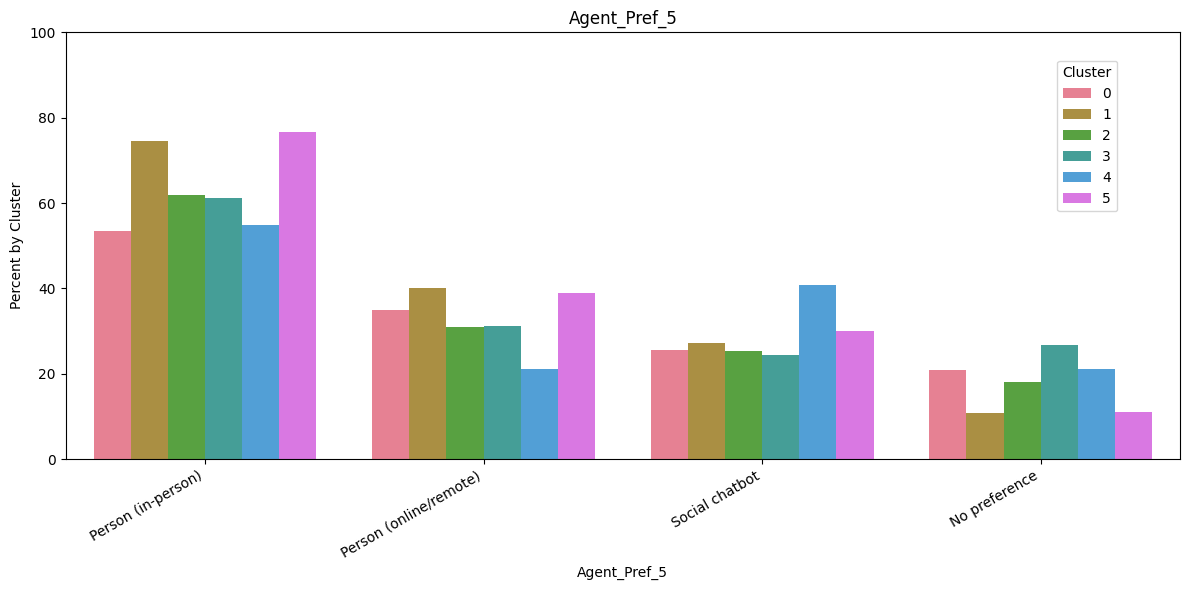

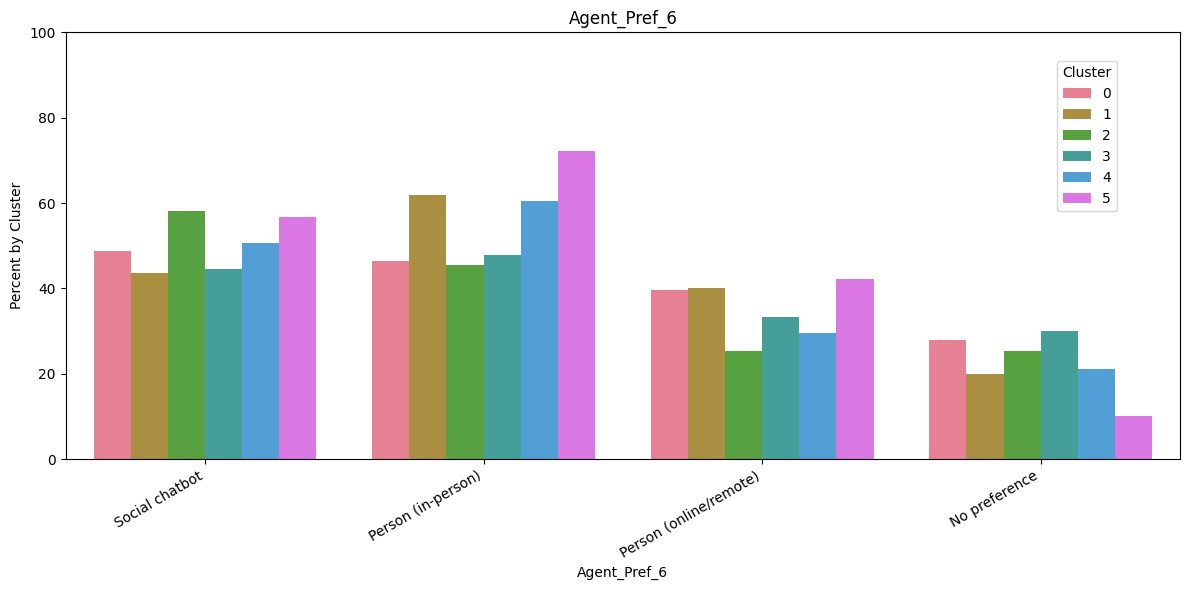

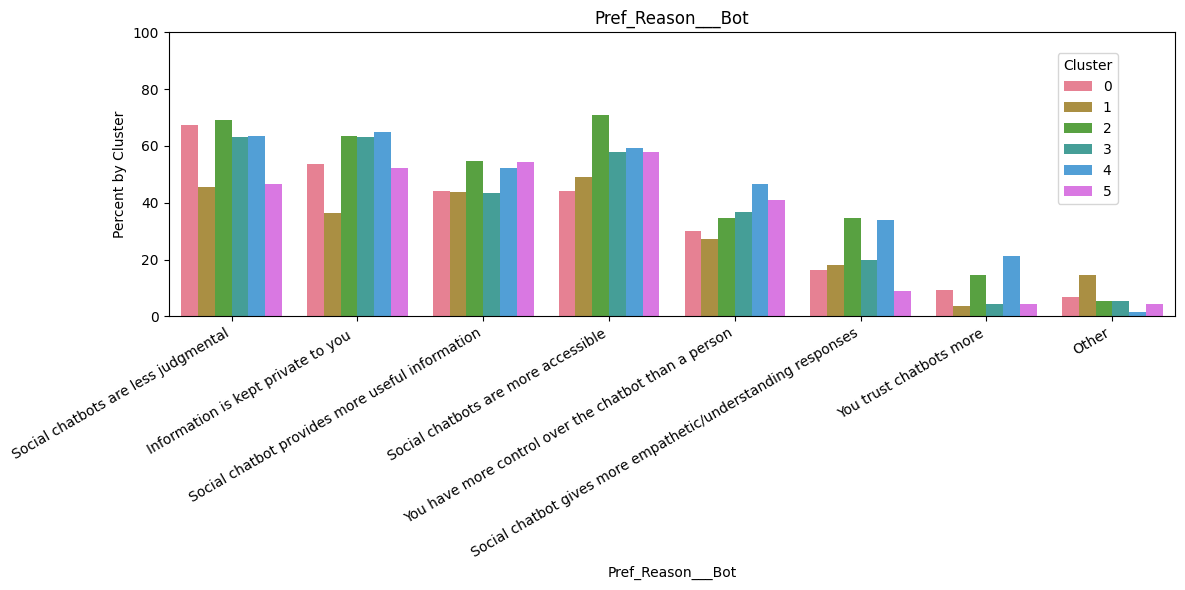

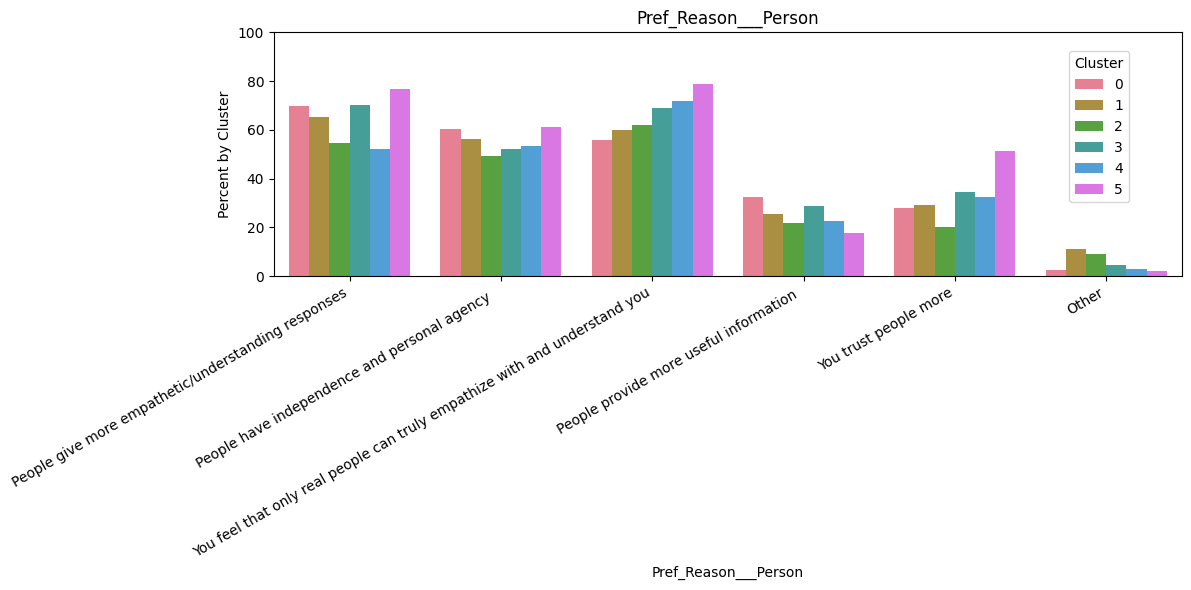

In [15]:
# Multi-select questions
multiselect_columns = ['Which_Chatbots', 'Usage_Timeframe', 'Chatbot_Device', 'Use_Interest', 'Continued_Use', 'Chatbot_Topics', 'Agent_Pref_1', 'Agent_Pref_2', 'Agent_Pref_3', 'Agent_Pref_4', 'Agent_Pref_5', 'Agent_Pref_6', 'Pref_Reason___Bot', 'Pref_Reason___Person']

for column in multiselect_columns:
    cluster_countplot_percentage(df, column)

In [18]:
# Export free response data
free_response_columns = [col for col in df_clusters.columns if col.endswith('___FR')]
export_df = df_clusters[['Cluster', 'Which_Chatbots'] + free_response_columns]
export_df.to_csv('/work/Output Data/cluster_free_responses.csv', index=False)

print("Free response data exported to 'cluster_free_responses.csv'")

Free response data exported to 'cluster_free_responses.csv'
